# Table of Content
1. Import Libraries & Data
2. Data Cleaning 
3. Hypothesis 
4. Reshape the variables 
5. Linear Regression
6. Compare Regression
7. Discussion

# 1. Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Ensures that the graphs created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Creating the path to import data
path=r'C:\Users\maryg\OneDrive\Career Foundry-Data Anlytics\Data Analytics Immersion\Exercise 6\12.7.23 Project'

In [4]:
#Importing Data
nyc_airbnb = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'upd_clean_nyc_airbnb.pkl'))

# 2. Data Cleaning

In [5]:
nyc_airbnb

id    host_id   nbhd_grp                nbhd  \
0                     2595       2845  Manhattan             Midtown   
1                     5121       7356   Brooklyn  Bedford-Stuyvesant   
2                     9357      30193  Manhattan      Hell's Kitchen   
3                     6848      15991   Brooklyn        Williamsburg   
4                    10452      35935   Brooklyn  Bedford-Stuyvesant   
...                    ...        ...        ...                 ...   
39155  1013632380355599044  401202937  Manhattan             Midtown   
39156  1014579690057145481  441448134   Brooklyn  Bedford-Stuyvesant   
39157  1015027293549591335  107434423  Manhattan            Kips Bay   
39158  1015027813525407338  107434423  Manhattan            Kips Bay   
39159  1015028181966283124  107434423  Manhattan            Kips Bay   

        latitude  longitude        room_type  price  min_night_stay  \
0      40.753560 -73.985590  Entire home/apt    240              30   
1      40.685350 -73.955120     Private room     66              30   
2      40.767240 -73.986640  Entire home/apt    175              45   
3      40.709350 -73.953420  Entire home/apt     81              30   
4      40.682940 -73.956820     Private room     90              30   
...          ...        ...              ...    ...             ...   
39155  40.747829 -73.986907     Private room     64               1   
39156  40.689207 -73.936728  Entire home/apt    119              30   
39157  40.744972 -73.977042  Entire home/apt    266              31   
39158  40.740508 -73.978347  Entire home/apt    322              31   
39159  40.739918 -73.978985  Entire home/apt    233              31   

       no_reviews last_review_date  no_monthly_reviews  host_listings_count  \
0              49        6/21/2022                0.29                    3   
1              50        12/2/2019                0.28                    2   
2              58        8/13/2017                0.34                    1   
3             191        8/14/2023                1.09                    1   
4              80        9/16/2023                0.49                    4   
...           ...              ...                 ...                  ...   
39155           0              nan                 NaN                   56   
39156           0              nan                 NaN                    1   
39157           0              nan                 NaN                  647   
39158           0              nan                 NaN                  647   
39159           0              nan                 NaN                  647   

       365_avail  no_of_reviews_ltm  nbhd_no  room_type_no price_range  
0            365                  0        1             1   min price  
1            120                  0        2             2   low price  
2            340                  0        1             1   min price  
3            110                  5        2             1   low price  
4            290                  2        2             2   low price  
...          ...                ...      ...           ...         ...  
39155         62                  0        1             2   low price  
39156        258                  0        2             1   low price  
39157        333                  0        1             1   min price  
39158        365                  0        1             1  high price  
39159        365                  0        1             1   min price  

[39160 rows x 18 columns]

In [6]:
nyc_airbnb.columns

Index(['id', 'host_id', 'nbhd_grp', 'nbhd', 'latitude', 'longitude',
       'room_type', 'price', 'min_night_stay', 'no_reviews',
       'last_review_date', 'no_monthly_reviews', 'host_listings_count',
       '365_avail', 'no_of_reviews_ltm', 'nbhd_no', 'room_type_no',
       'price_range'],
      dtype='object')

In [7]:
nyc_airbnb.shape

(39160, 18)

In [8]:
#Check for missing values
nyc_airbnb.isnull().sum()

id                         0
host_id                    0
nbhd_grp                   0
nbhd                       0
latitude                   0
longitude                  0
room_type                  0
price                      0
min_night_stay             0
no_reviews                 0
last_review_date           0
no_monthly_reviews     10949
host_listings_count        0
365_avail                  0
no_of_reviews_ltm          0
nbhd_no                    0
room_type_no               0
price_range                0
dtype: int64

In [9]:
#Create a dataframe for missing values
nyc_airbnb_nan = nyc_airbnb[nyc_airbnb['no_monthly_reviews'].isnull() == True]

In [10]:
nyc_airbnb_nan

id    host_id   nbhd_grp                nbhd  \
6                    11943      45445   Brooklyn            Flatbush   
28                   63588     295128      Bronx        Clason Point   
36                   64015     146944  Manhattan        East Village   
55                   68253      67730     Queens             Astoria   
103                  89427     116599   Brooklyn        Clinton Hill   
...                    ...        ...        ...                 ...   
39155  1013632380355599044  401202937  Manhattan             Midtown   
39156  1014579690057145481  441448134   Brooklyn  Bedford-Stuyvesant   
39157  1015027293549591335  107434423  Manhattan            Kips Bay   
39158  1015027813525407338  107434423  Manhattan            Kips Bay   
39159  1015028181966283124  107434423  Manhattan            Kips Bay   

        latitude  longitude        room_type  price  min_night_stay  \
6      40.637020 -73.963270     Private room    150              30   
28     40.811610 -73.854990     Private room     89              30   
36     40.728630 -73.984200  Entire home/apt    200              30   
55     40.763360 -73.920990     Private room     55              30   
103    40.685130 -73.966480  Entire home/apt    800              30   
...          ...        ...              ...    ...             ...   
39155  40.747829 -73.986907     Private room     64               1   
39156  40.689207 -73.936728  Entire home/apt    119              30   
39157  40.744972 -73.977042  Entire home/apt    266              31   
39158  40.740508 -73.978347  Entire home/apt    322              31   
39159  40.739918 -73.978985  Entire home/apt    233              31   

       no_reviews last_review_date  no_monthly_reviews  host_listings_count  \
6               0              nan                 NaN                    1   
28              0              nan                 NaN                    6   
36              0              nan                 NaN                    1   
55              0              nan                 NaN                    1   
103             0              nan                 NaN                    3   
...           ...              ...                 ...                  ...   
39155           0              nan                 NaN                   56   
39156           0              nan                 NaN                    1   
39157           0              nan                 NaN                  647   
39158           0              nan                 NaN                  647   
39159           0              nan                 NaN                  647   

       365_avail  no_of_reviews_ltm  nbhd_no  room_type_no price_range  
6              0                  0        2             2   min price  
28           262                  0        4             2   low price  
36             0                  0        1             1   min price  
55             0                  0        3             2   low price  
103          358                  0        2             1  high price  
...          ...                ...      ...           ...         ...  
39155         62                  0        1             2   low price  
39156        258                  0        2             1   low price  
39157        333                  0        1             1   min price  
39158        365                  0        1             1  high price  
39159        365                  0        1             1   min price  

[10949 rows x 18 columns]

Notes(missing values): The missing values in column no_monthly_reviews are cause by zero number of reviews for that AirBnb
Action: Missing data type in the no_monthly_reviews column will be change to strings. 

In [12]:
# Change no_monthly_reviews data column to string data type 
nyc_airbnb['no_monthly_reviews'] = nyc_airbnb['no_monthly_reviews'].astype('str')

In [13]:
#Recheck for missing values
nyc_airbnb.isnull().sum()

id                     0
host_id                0
nbhd_grp               0
nbhd                   0
latitude               0
longitude              0
room_type              0
price                  0
min_night_stay         0
no_reviews             0
last_review_date       0
no_monthly_reviews     0
host_listings_count    0
365_avail              0
no_of_reviews_ltm      0
nbhd_no                0
room_type_no           0
price_range            0
dtype: int64

In [14]:
#Checked for duplicates
nyc_airbnb_dup = nyc_airbnb.duplicated()

In [15]:
nyc_airbnb_dup

0        False
1        False
2        False
3        False
4        False
         ...  
39155    False
39156    False
39157    False
39158    False
39159    False
Length: 39160, dtype: bool

Notes: No duplicates found in the dataframe

In [16]:
nyc_airbnb.describe()

id       host_id      latitude     longitude         price  \
count  3.916000e+04  3.916000e+04  39160.000000  39160.000000  39160.000000   
mean   2.932430e+17  1.575643e+08     40.729372    -73.945897    205.995480   
std    3.943340e+17  1.693066e+08      0.056645      0.054958    466.662167   
min    2.595000e+03  1.678000e+03     40.500314    -74.251907      0.000000   
25%    1.991531e+07  1.654341e+07     40.688880    -73.982819     76.000000   
50%    4.574172e+07  7.831966e+07     40.726470    -73.953960    130.000000   
75%    7.354150e+17  2.783108e+08     40.762632    -73.926260    220.000000   
max    1.015028e+18  5.442621e+08     40.911380    -73.713650  30000.000000   

       min_night_stay    no_reviews  host_listings_count     365_avail  \
count    39160.000000  39160.000000         39160.000000  39160.000000   
mean        30.272165     25.584397            39.493105    153.915628   
std         26.534306     57.488642           117.040976    144.305706   
min          1.000000      0.000000             1.000000      0.000000   
25%         30.000000      0.000000             1.000000      0.000000   
50%         30.000000      4.000000             1.000000    130.000000   
75%         30.000000     23.000000             6.000000    309.000000   
max       1250.000000   1854.000000           647.000000    365.000000   

       no_of_reviews_ltm       nbhd_no  room_type_no  
count       39160.000000  39160.000000  39160.000000  
mean            6.735674      1.816139      1.478115  
std            17.023977      0.884103      0.545001  
min             0.000000      1.000000      1.000000  
25%             0.000000      1.000000      1.000000  
50%             0.000000      2.000000      1.000000  
75%             5.000000      2.000000      2.000000  
max           900.000000      5.000000      4.000000

C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


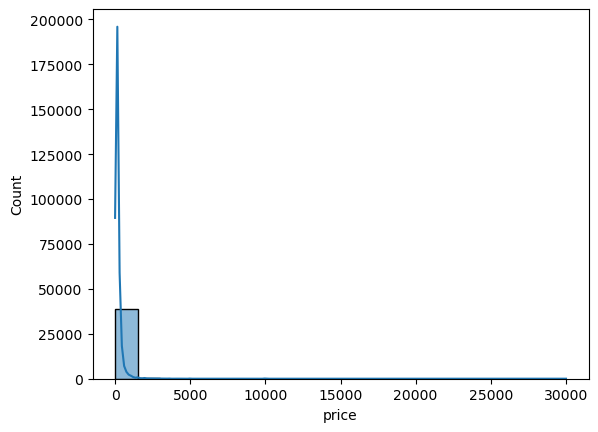

In [17]:
#Checking for extreme values 'price'
hist_price = sns.histplot(nyc_airbnb['price'], bins=20, kde = True)

In [ ]:
#The price column has a extreme value(s) of 30,000

In [19]:
# Check how many extreme values exist
nyc_airbnb[nyc_airbnb['price'] > 5000]

id    host_id   nbhd_grp                nbhd  \
1526              2243699    1483320  Manhattan           Chinatown   
1561              2271504   11598359   Brooklyn        Clinton Hill   
2428              4251721   21939817     Queens    Long Island City   
2494              4308991    6195809  Manhattan        East Village   
2728              4737930    1235070  Manhattan         East Harlem   
4603              8069030   42619297   Brooklyn         Fort Greene   
5327              9528920    3906464  Manhattan     Lower East Side   
6835             12520066   66240032  Manhattan   Greenwich Village   
7586             13925864   58480311     Queens    Long Island City   
8078             15345019   88972153   Brooklyn          Greenpoint   
8428             16330110  105075484   Brooklyn            Canarsie   
8810             17416959    1261480  Manhattan              Harlem   
10011            20464496   49519069     Queens           Briarwood   
11151            22436899   72390391  Manhattan     Upper West Side   
13080            28888147   43825799  Manhattan     Upper East Side   
14061            31177983   57677436  Manhattan     Upper East Side   
14090            31219800  172226912  Manhattan         Murray Hill   
15060            34490359  260618374  Manhattan    Theater District   
15069            34490368  260618374  Manhattan    Theater District   
15671            36056808  271248669  Manhattan             Tribeca   
16731            38993493  298338860  Manhattan             Midtown   
16733            38993556  298338860  Manhattan             Midtown   
16735            38993679  298338860  Manhattan             Midtown   
16905            39574087  266741420  Manhattan     Lower East Side   
21557            49920227   76699286      Bronx            Longwood   
23494            52862058   57586379  Manhattan  Financial District   
27287  658503812592195974  363776653  Manhattan         East Harlem   
28266  692813905111173363   34906299  Manhattan   Battery Park City   
31989  812431157705601911  496944100  Manhattan                SoHo   
31992  812431247715205745  496944100  Manhattan                SoHo   
31993  812431333020367058  496944100  Manhattan                SoHo   
32145  812941474805200850  496944100  Manhattan                SoHo   
32147  812941566017191022  496944100  Manhattan                SoHo   
32148  812941643927531244  496944100  Manhattan                SoHo   
32810  830656153550799267   76166434  Manhattan             Midtown   
32818  830682282357157632   76166434  Manhattan             Midtown   
35479  903598948687604703   34906299  Manhattan     Lower East Side   
35502  904523946643334652  326084746  Manhattan                SoHo   
35503  904524100106225881  326084746  Manhattan                SoHo   
35506  904524223667771043  326084746  Manhattan                SoHo   
35512  904526596298258537  326084746  Manhattan             Midtown   
35523  904527164135938359  326084746  Manhattan             Midtown   
35810  912396732617862267   34906299  Manhattan     Upper East Side   
35812  912401924564160654   34906299  Manhattan     Upper East Side   
36897  954380532204630113  501999278  Manhattan             Midtown   

        latitude  longitude        room_type  price  min_night_stay  \
1526   40.717100 -73.999050  Entire home/apt   5250              30   
1561   40.687990 -73.965200  Entire home/apt   6500              30   
2428   40.742490 -73.952360     Private room  10000              30   
2494   40.724800 -73.989510     Private room   9990              30   
2728   40.794350 -73.938930  Entire home/apt   9999              30   
4603   40.692310 -73.969670  Entire home/apt   7498              30   
5327   40.713020 -73.985730     Private room   7314              99   
6835   40.731210 -73.994970  Entire home/apt   6000              30   
7586   40.761280 -73.931410  Entire home/apt  10000              30   
8078   40.730680 -73.957410     Private room  

C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


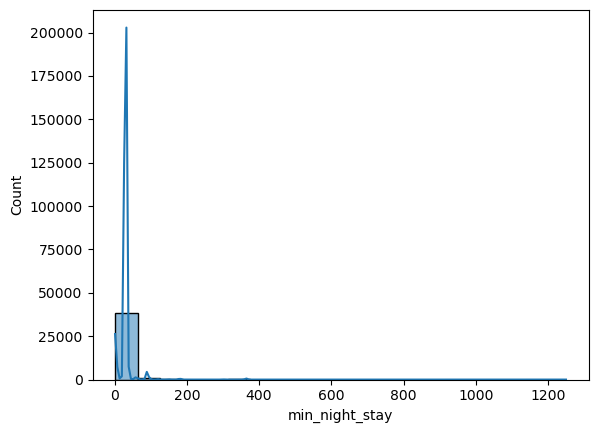

In [20]:
#Checking for extreme values 'min_night_stay'
hist_min_night_stay = sns.histplot(nyc_airbnb['min_night_stay'], bins=20, kde = True)

In [ ]:
#The min_night_stay column has extreme values up to 1250 nights

In [21]:
# Check how many extreme values exist
nyc_airbnb[nyc_airbnb['min_night_stay'] > 400]

id    host_id   nbhd_grp                 nbhd   latitude  \
1769    2942732     160337  Manhattan   Washington Heights  40.835630   
2392    4204302   17550546  Manhattan    Greenwich Village  40.732930   
3127    5431845    3680008     Queens     Long Island City  40.752790   
3455    6169897   10720264  Manhattan               Harlem  40.820440   
4669    8341919   43945071     Queens     Long Island City  40.746380   
4829    8668115    8996336   Brooklyn        Crown Heights  40.670420   
6229   11096888    2228137   Brooklyn      Windsor Terrace  40.649310   
13590  30378211  200401254  Manhattan    Greenwich Village  40.731520   
15651  36002802  265172138  Manhattan      Upper East Side  40.770300   
17248  40302355  257908724  Manhattan  Morningside Heights  40.804400   
17320  40368174   42061478  Manhattan   Washington Heights  40.854540   
18437  43002373  193904277     Queens          Kew Gardens  40.709190   
22501  51425482  380355687  Manhattan         West Village  40.733143   

       longitude        room_type  price  min_night_stay  no_reviews  \
1769  -73.947860  Entire home/apt     60            1124           8   
2392  -73.997820  Entire home/apt    180            1250           2   
3127  -73.940890  Entire home/apt    134             500          29   
3455  -73.956240  Entire home/apt     75             500           0   
4669  -73.956180  Entire home/apt    199             480           0   
4829  -73.948390     Private room     50             500          10   
6229  -73.979770     Private room     45             500           0   
13590 -74.000520      Shared room     31             999           0   
15651 -73.961150  Entire home/apt    500             500          11   
17248 -73.965740  Entire home/apt     50            1000           2   
17320 -73.932170     Private room    100            1000           1   
18437 -73.827270     Private room    130             500           0   
22501 -74.009605  Entire home/apt    202             700           6   

      last_review_date no_monthly_reviews  host_listings_count  365_avail  \
1769         6/15/2019               0.07                    1        365   
2392         11/9/2014               0.02                    1          0   
3127         1/20/2018               0.28                    1         90   
3455               nan                nan                    1          0   
4669               nan                nan                    1          0   
4829         9/22/2016                0.1                    1        364   
6229               nan                nan                    1        358   
13590              nan                nan                    1          0   
15651        3/17/2020               0.22                    1         89   
17248         1/6/2020               0.04                    1          0   
17320         1/1/2020               0.02                    1        179   
18437              nan                nan                    1         89   
22501       10/16/2023               0.23                    1         39   

       no_of_reviews_ltm  nbhd_no  room_type_no price_range  
1769                   0        1             1   low price  
2392                   0        1             1   min price  
3127                   0        3             1   low price  
3455                   0        1             1   low price  
4669                   0        3             1   min price  
4829                   0        2             2   low price  
6229                   0        2             2   low price  
13590                  0        1             3   low price  
15651                  0        1             1  high price  
17248                  0        1             1   low price  
17320                  0        1             2   low price  
18437                  0        3             2   low price  
22501                  4        1             1   min price

C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\maryg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


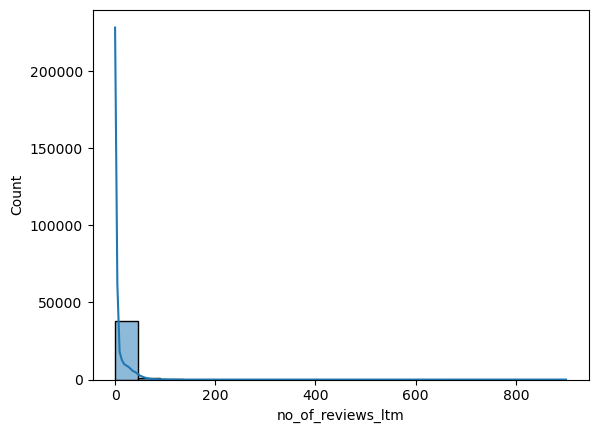

In [22]:
#Checking for extreme values 'no_of_reviews_ltm'
hist_no_of_reviews_ltm = sns.histplot(nyc_airbnb['no_of_reviews_ltm'], bins=20, kde = True)

In [ ]:
#The no_of_reviews_ltm has extreme values up to 900.

In [23]:
#Check how many extreme values exist
nyc_airbnb[nyc_airbnb['no_of_reviews_ltm'] > 100]

id    host_id   nbhd_grp              nbhd   latitude  \
8818             17665943  119987770     Queens     East Elmhurst  40.760940   
9203             18671835  129743937     Queens     East Elmhurst  40.758090   
11934            24996332  129743937     Queens     East Elmhurst  40.758000   
12770            27866657  101498908   Brooklyn     East Flatbush  40.650620   
15053            34490351  260618374  Manhattan  Theater District  40.755440   
...                   ...        ...        ...               ...        ...   
29903  752124066836971423   88566861  Manhattan   Lower East Side  40.720200   
30036  757149473920319178  487163726     Queens           Jamaica  40.669780   
30050  757318950542595961   92900025     Queens         Laurelton  40.684669   
33285  842859220033081539  149431096     Queens           Jamaica  40.676098   
33833  858697692672545141  503712643  Manhattan           Chelsea  40.749721   

       longitude     room_type  price  min_night_stay  no_reviews  \
8818  -73.878460  Private room     72              30         663   
9203  -73.868060  Private room     55              30         406   
11934 -73.869910  Private room     65              30         500   
12770 -73.952270  Private room     68               1         326   
15053 -73.988370    Hotel room    659               1         167   
...          ...           ...    ...             ...         ...   
29903 -73.990600  Private room    296               1         116   
30036 -73.774950  Private room    130              30         102   
30050 -73.747327  Private room     70              30         114   
33285 -73.778631  Private room     63               1         125   
33833 -73.994724  Private room    142               1         337   

      last_review_date no_monthly_reviews  host_listings_count  365_avail  \
8818        10/17/2023               8.24                    2        348   
9203         10/1/2023               6.11                    2         89   
11934        10/8/2023               7.52                    2         61   
12770       10/17/2023               5.19                    2         51   
15053       10/16/2023               3.15                   13        342   
...                ...                ...                  ...        ...   
29903       10/30/2023              10.88                    3        295   
30036       10/16/2023               9.81                    1        364   
30050       10/26/2023              12.35                    2        349   
33285       10/31/2023              16.23                    3        305   
33833        11/1/2023              47.46                    1        361   

       no_of_reviews_ltm  nbhd_no  room_type_no price_range  
8818                 106        3             2   low price  
9203                 114        3             2   low price  
11934                110        3             2   low price  
12770                109        2             2   low price  
15053                136        1             4  high price  
...                  ...      ...           ...         ...  
29903                116        1             2   min price  
30036                102        3             2   low price  
30050                114        3             2   low price  
33285                125        3             2   low price  
33833                337        1             2   low price  

[64 rows x 18 columns]

In [24]:
# Clean extreme values
nyc_abnb = nyc_airbnb[(nyc_airbnb['no_of_reviews_ltm'] <= 100) & (nyc_airbnb['min_night_stay'] <= 400) & (nyc_airbnb['price'] <= 5000)]

In [25]:
nyc_airbnb.shape

(39160, 18)

In [26]:
nyc_abnb.shape

(39038, 18)

# 3. Hypothesis 

In [ ]:
# Hypothesis 
# Null Hypothesis: Guests prefer to stay in high price Airbnbs than low and mid-price Airbnbs
# Alternative Hypothesis: Guests prefer to stay in more low and mid-price Airbnbs than high price Airbnbs
#*number of reviews will indiacte stays

# 4. Reshape the variables 

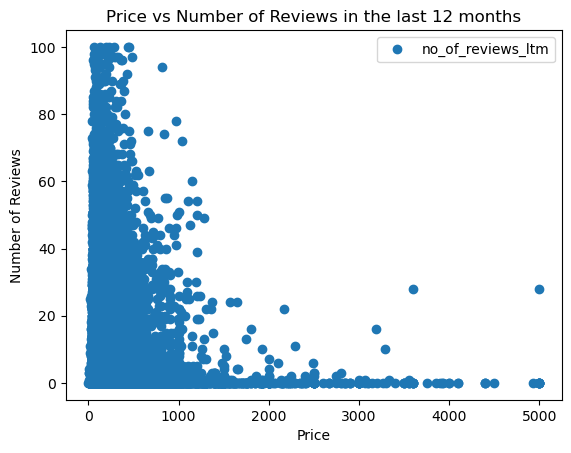

In [34]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
nyc_abnb.plot(x = 'price', y='no_of_reviews_ltm',style='o') 
plt.title('Price vs Number of Reviews in the last 12 months')  
plt.xlabel('Price')  
plt.ylabel('Number of Reviews')  
plt.show()

In [35]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = nyc_abnb['price'].values.reshape(-1,1)
y = nyc_abnb['no_of_reviews_ltm'].values.reshape(-1,1)

In [36]:
X

array([[240],
       [ 66],
       [175],
       ...,
       [266],
       [322],
       [233]], dtype=int64)

In [37]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

# 5. Linear Regression

In [38]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
# Create a regression object.
regression = LinearRegression() 

In [41]:
regression.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

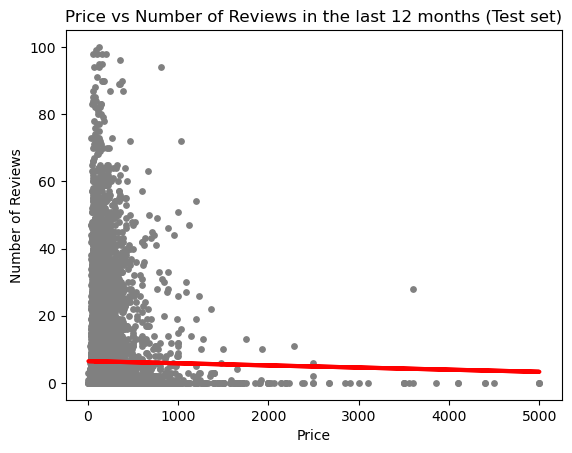

In [43]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs Number of Reviews in the last 12 months (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Number of Reviews')
plot_test.show()

In [44]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [45]:
# Print the model summary statistics. 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00063417]]
Mean squared error:  177.38014697535814
R2 score:  -2.5163978232045636e-05


In [46]:
y_predicted

array([[6.4229116 ],
       [6.20729247],
       [6.38930039],
       ...,
       [6.27514908],
       [6.31890708],
       [6.42164326]])

In [51]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0        0   6.422912
1       16   6.207292
2        0   6.389300
3        0   6.453986
4        0   6.452718
5       41   6.441937
6        0   6.382959
7        0   6.459694
8       32   6.405155
9        4   6.405155
10       0   6.449547
11       0   6.396276
12       5   6.348713
13       0   6.458425
14       0   6.325883
15      21   6.443205
16      36   6.222513
17       0   6.452084
18       2   6.048749
19      44   5.880693
20       2   6.408326
21       0   6.421009
22       1   6.262466
23       0   6.230757
24       0   6.452718
25       0   6.356958
26       0   6.417838
27      12   6.440034
28       6   6.436863
29      37   6.321444

# 6. Compare Regression 

In [52]:
y_predicted_train = regression.predict(X_train)

In [53]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [54]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00063417]]
Mean squared error:  172.09040813703297
R2 score:  0.0001503833187284087


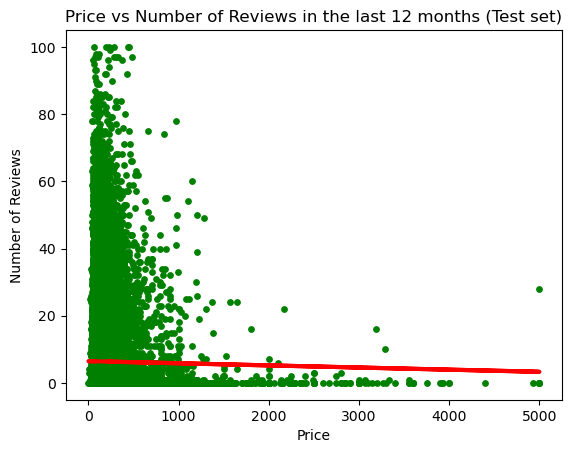

In [55]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price vs Number of Reviews in the last 12 months (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Number of Reviews')
plot_test.show()

# 7. Discussion
There is a negative slope which means that as prices go up the chances of the Airbnb to be booked decreases and vice versa. At the same time, MSE indicates that the regression line is far from the date points, and it isn’t an accurate representation of data. Lastly, R2 equals .0000251 which means a poor fitting to the data. 

The dataframe comparing the actual and predicted values of y shows an even poorer fitting model for the data.

The model did not overfit since the training set has a R2 score of 0.00015 and the test set had a R2 score of 0.0000251